### Irakoze Irene
 
### Task 4:- Explotary Data Analysis-Terrorism(Level-Intermediate)

In [2]:
# importing all libraries needed in this notebook
import math
import warnings
import numpy as np
import seaborn as sns
import  pandas as pd
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

### Step 1: Roading and Reading the dataset

In [3]:
global_terror = pd.read_csv("globalterrorismdb_0718dist.csv",encoding ='latin1')

In [4]:
global_terror.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [6]:
# checking the columns name in dataset
global_terror.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [7]:
# checking the dataset size 
global_terror.shape

(181691, 135)

In [29]:
global_terror.rename(columns={'iyear': 'year', 'imonth': 'month', 'iday':'day', 'country_txt':'country','attacktype1_txt':'attactype','nwound':'wound','nkill':'killed',
                  'region_txt':'region', 'targtype1_txt':'target', 'gname':'group', 'weaptype1_txt':'weapon'}, inplace=True)

### Step 2:Dropping out irrelevant Data

In [30]:
# Important data for further processing
global_terror=global_terror[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [31]:
global_terror.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [32]:
# checking the nulll values
global_terror.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

### Step3; Checking the dataset Informations 

In [33]:
global_terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   state        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   city         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Target       181055 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
 17  Motive       50561 non-null   object 
dtypes: float64(4), int64(3),

In [34]:
global_terror.describe()

,Year,Month,Day,latitude,longitude,Killed,Wounded
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


### Step4: Data visualizations 

### Destructive features

In [35]:
print("Country with the most attacks:",global_terror['Country'].value_counts().idxmax())
print("City with the most attacks:",global_terror['city'].value_counts().index[1]) #as first entry is 'unknown'
print("Region with the most attacks:",global_terror['Region'].value_counts().idxmax())
print("Year with the most attacks:",global_terror['Year'].value_counts().idxmax())
print("Month with the most attacks:",global_terror['Month'].value_counts().idxmax())
print("Group with the most attacks:",global_terror['Group'].value_counts().index[1])
print("Most Attack Types:",global_terror['AttackType'].value_counts().idxmax())

Country with the most attacks: Iraq
City with the most attacks: Baghdad
Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion


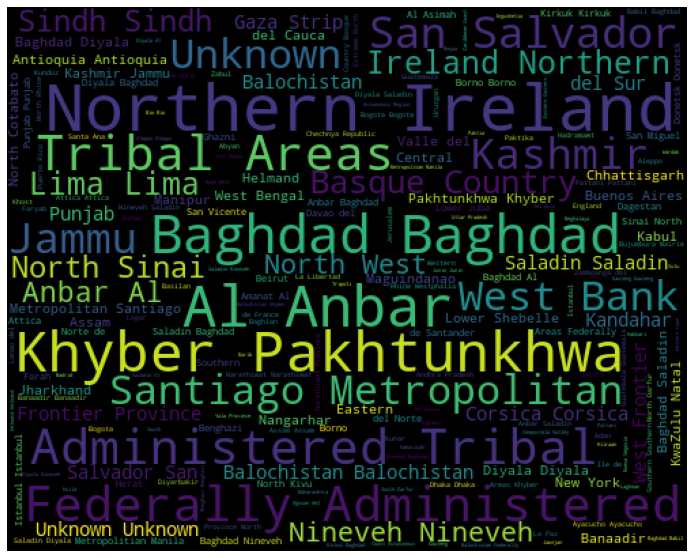

In [92]:
from wordcloud import WordCloud
from scipy import signal
cities = global_terror.state.dropna(False)
plt.subplots(figsize=(20,10))
wordcloud = WordCloud(background_color = 'black',
                     width = 500,
                     height = 400).generate(' '.join(cities))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [37]:
global_terror['Year'].value_counts(dropna = False).sort_index()

1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: Year, dtype: int64

### Number of  terrorist attack in each year 

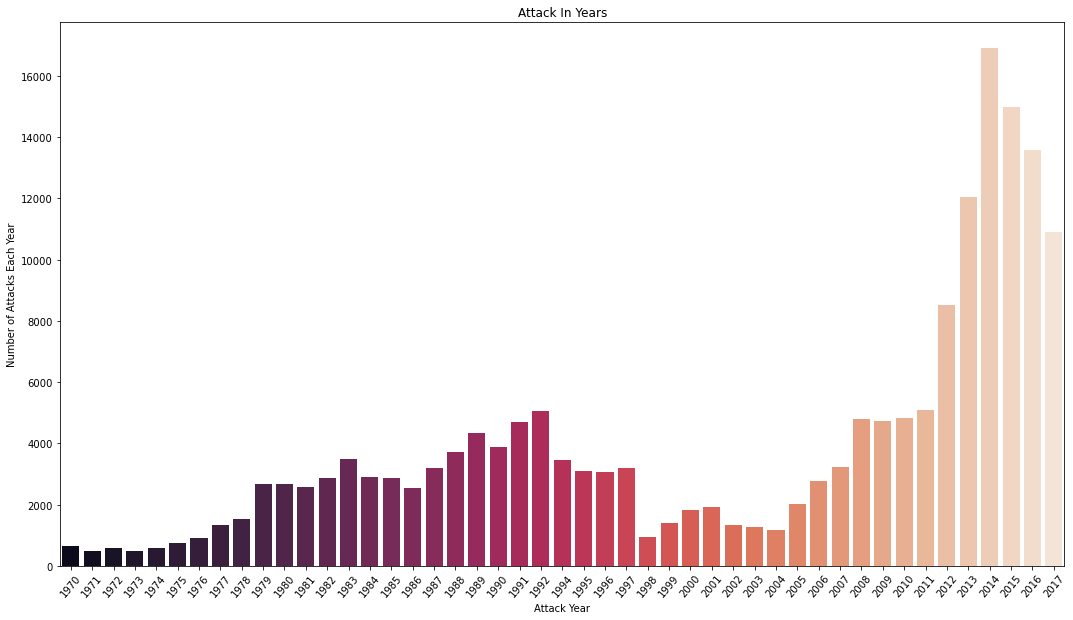

In [38]:
x_year = global_terror['Year'].unique()
y_count_years = global_terror['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = x_year,
           y = y_count_years,
           palette = 'rocket')
plt.xticks(rotation = 50)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks Each Year')
plt.title('Attack In Years')
plt.show()

### neat Graph in a year wise 

In [39]:
global_terror['Decade'] = pd.cut(global_terror['Year'], bins=[1969, 1980, 1990, 2000, 2010, 2020], labels=['1970-1980', '1980-1990', '1990-2000', '2000-2010', '2010-2017'])
global_terror[['Year','Decade']].sample(10)

,Year,Decade
144865,2015,2010-2017
108726,2012,2010-2017
36785,1989,1980-1990
30669,1987,1980-1990
51539,1992,1990-2000
138842,2014,2010-2017
167546,2016,2010-2017
165145,2016,2010-2017
18685,1983,1980-1990
73463,2001,2000-2010


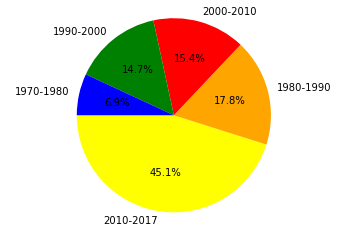

In [40]:
deca= global_terror['Decade'].value_counts()
colors= 'yellow','orange','red','green','blue'
plt.pie(deca,labels=deca.index,colors=colors,autopct='%1.1f%%', startangle=180)
plt.axis('equal')
plt.show()

### Number of terrorist attack by region wise 

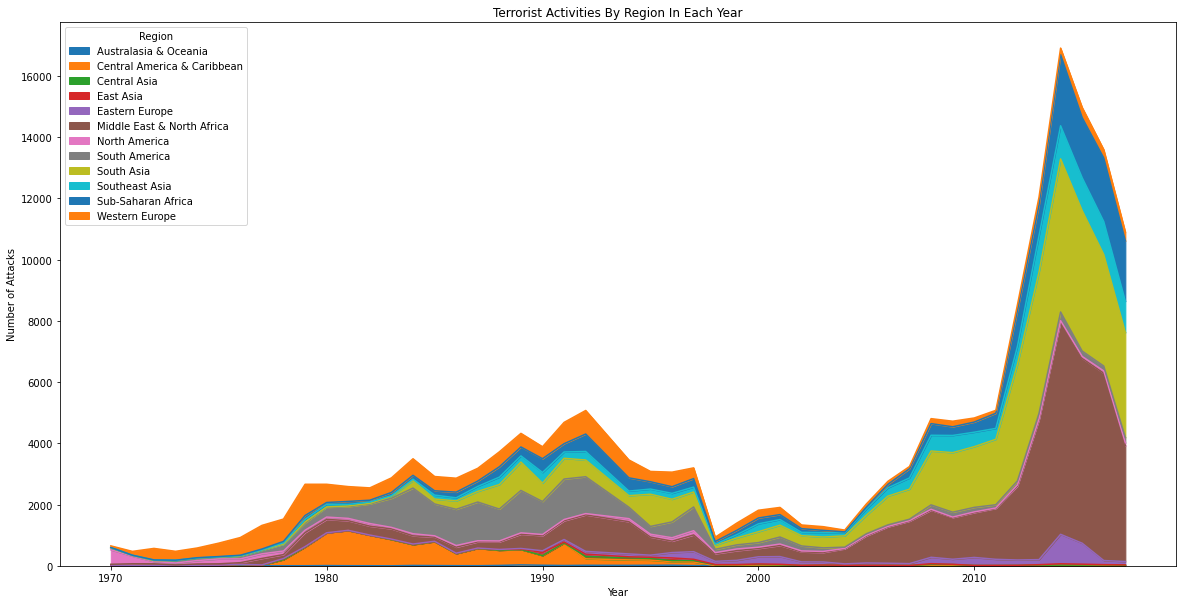

In [41]:
pd.crosstab(global_terror.Year, global_terror.Region).plot(kind='area',figsize=(20,10))
plt.title('Terrorist Activities By Region In Each Year')
plt.ylabel('Number of Attacks')
plt.show()

### Which City Attacked most

In [58]:
def city_name(country=list(global_terror['Country'].unique())):
    a=global_terror[global_terror['Country']==country]
    a=pd.DataFrame(a['city'].value_counts().iloc[1:10])
    return a.style.highlight_max(axis=0, color='pink').highlight_min(axis=0, color='yellow')

In [59]:
city_name(global_terror['Country'])

,city
Baghdad,7589
Karachi,2652
Lima,2359
Mosul,2265
Belfast,2171
Santiago,1621
Mogadishu,1581
San Salvador,1558
Istanbul,1048


### weapons maximum used by terrorism

In [68]:
def weapon_type(country=list(global_terror['Country'].unique())):
    a=global_terror[global_terror['Country']==country]
    a=pd.DataFrame(a['Weapon_type'].value_counts())
    return a.style.highlight_max(axis=0)

In [69]:
weapon_type(global_terror['Country'])

,Weapon_type
Explosives,92426
Firearms,58524
Unknown,15157
Incendiary,11135
Melee,3655
Chemical,321
Sabotage Equipment,141
"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)",136
Other,114
Biological,35


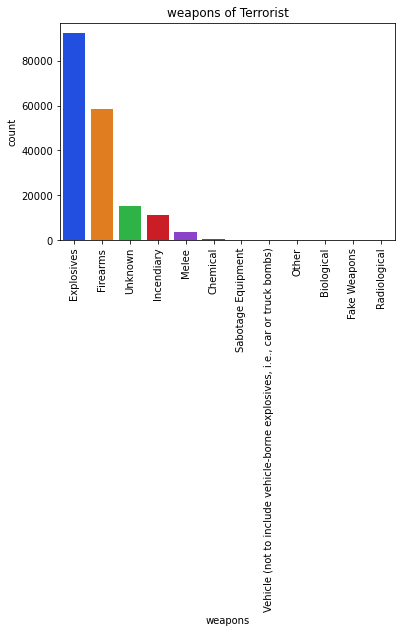

In [70]:
sns.countplot('Weapon_type',data=global_terror,palette='bright',order=global_terror['Weapon_type'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('weapons')
plt.title('weapons of Terrorist')
plt.show()

### Top countries affected by terrorist attack

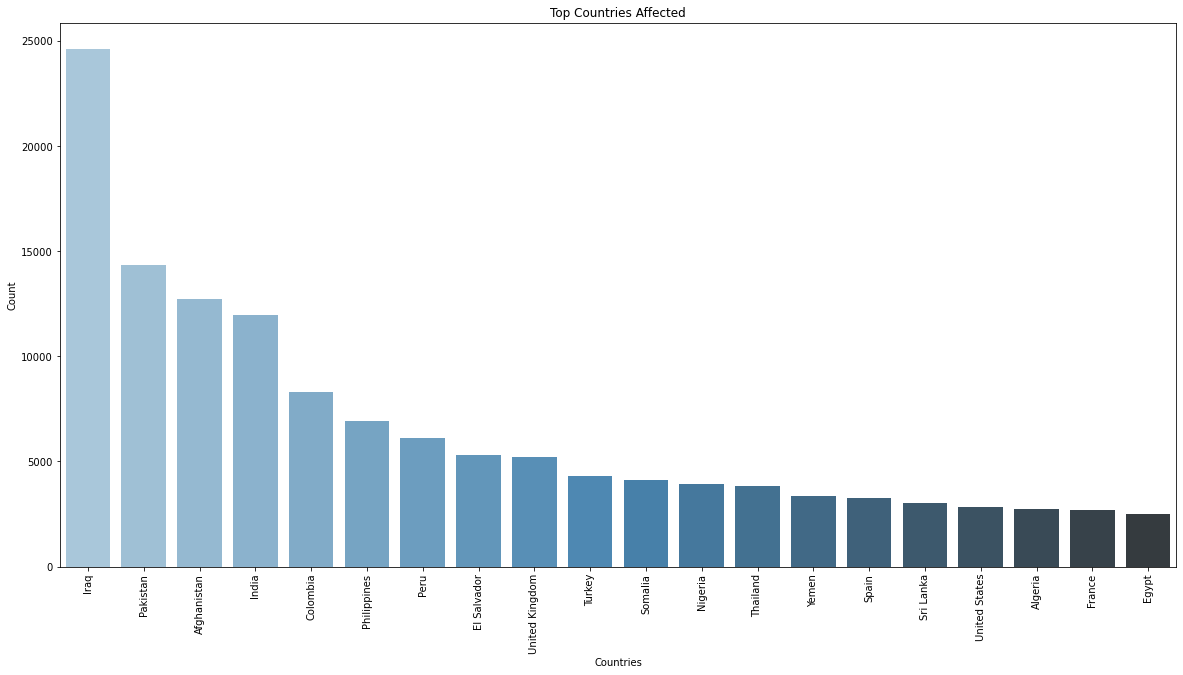

In [45]:
plt.subplots(figsize=(20,10))
sns.barplot(global_terror['Country'].value_counts()[:20].index,global_terror['Country'].value_counts()[:20].values,palette='Blues_d')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

### Which people highly affect

Text(0, 0.5, 'Wounded')

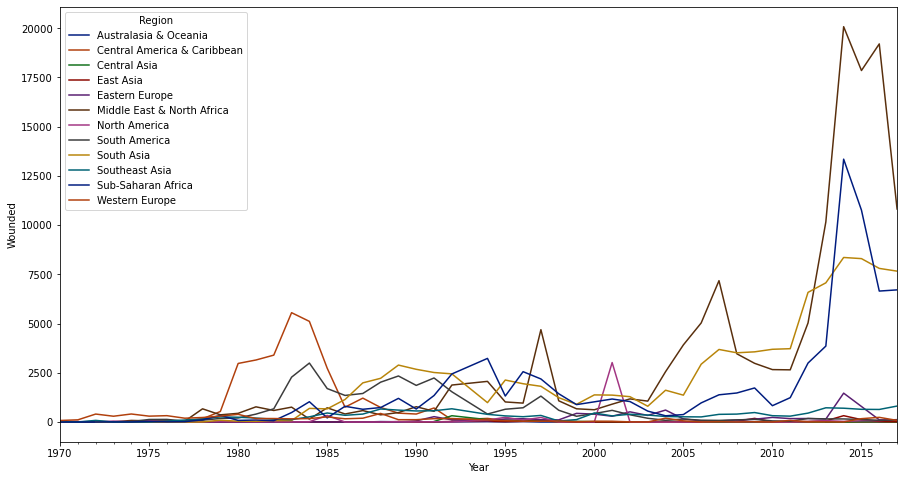

In [46]:
h=global_terror.groupby(['Year','Region'])['Killed'].sum()
plot_data = h.unstack('Region').loc[:]
plot_data.index = pd.PeriodIndex(plot_data.index.tolist(),freq='A')
plot_data.plot(figsize=(15,8),color=sns.color_palette('dark',12))
plt.xlabel("Year")
plt.ylabel("Wounded")

### Types of terrorism attack that cause deaths

In [73]:
# Total Number of people killed in terror attack
killData = global_terror.loc[:,'Killed']
print('Number of people killed by terror attack:', int(sum(killData.dropna())))# drop the NaN values

Number of people killed by terror attack: 411868


In [74]:
# Let's look at what types of attacks these deaths were made of.
attackData = global_terror.loc[:,'AttackType']
# attackData
typeKillData = pd.concat([attackData, killData], axis=1)

In [75]:
typeKillData.head()

,AttackType,Killed
0,Assassination,1.0
1,Hostage Taking (Kidnapping),0.0
2,Assassination,1.0
3,Bombing/Explosion,NaN
4,Facility/Infrastructure Attack,NaN


In [93]:
# Number of Killed in Terrorist Attacks by Countries
countryData = global_terror.loc[:,'Country']
# countyData
countryKillData = pd.concat([countryData, killData], axis=1)

In [94]:
countryKillFormatData = countryKillData.pivot_table(columns='Country', values='Killed', aggfunc='sum')
countryKillFormatData

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
Killed,39384.0,42.0,11066.0,0.0,3043.0,0.0,490.0,37.0,23.0,30.0,...,1.0,0.0,1500.0,97.0,1.0,8776.0,119.0,324.0,70.0,154.0


In [96]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size

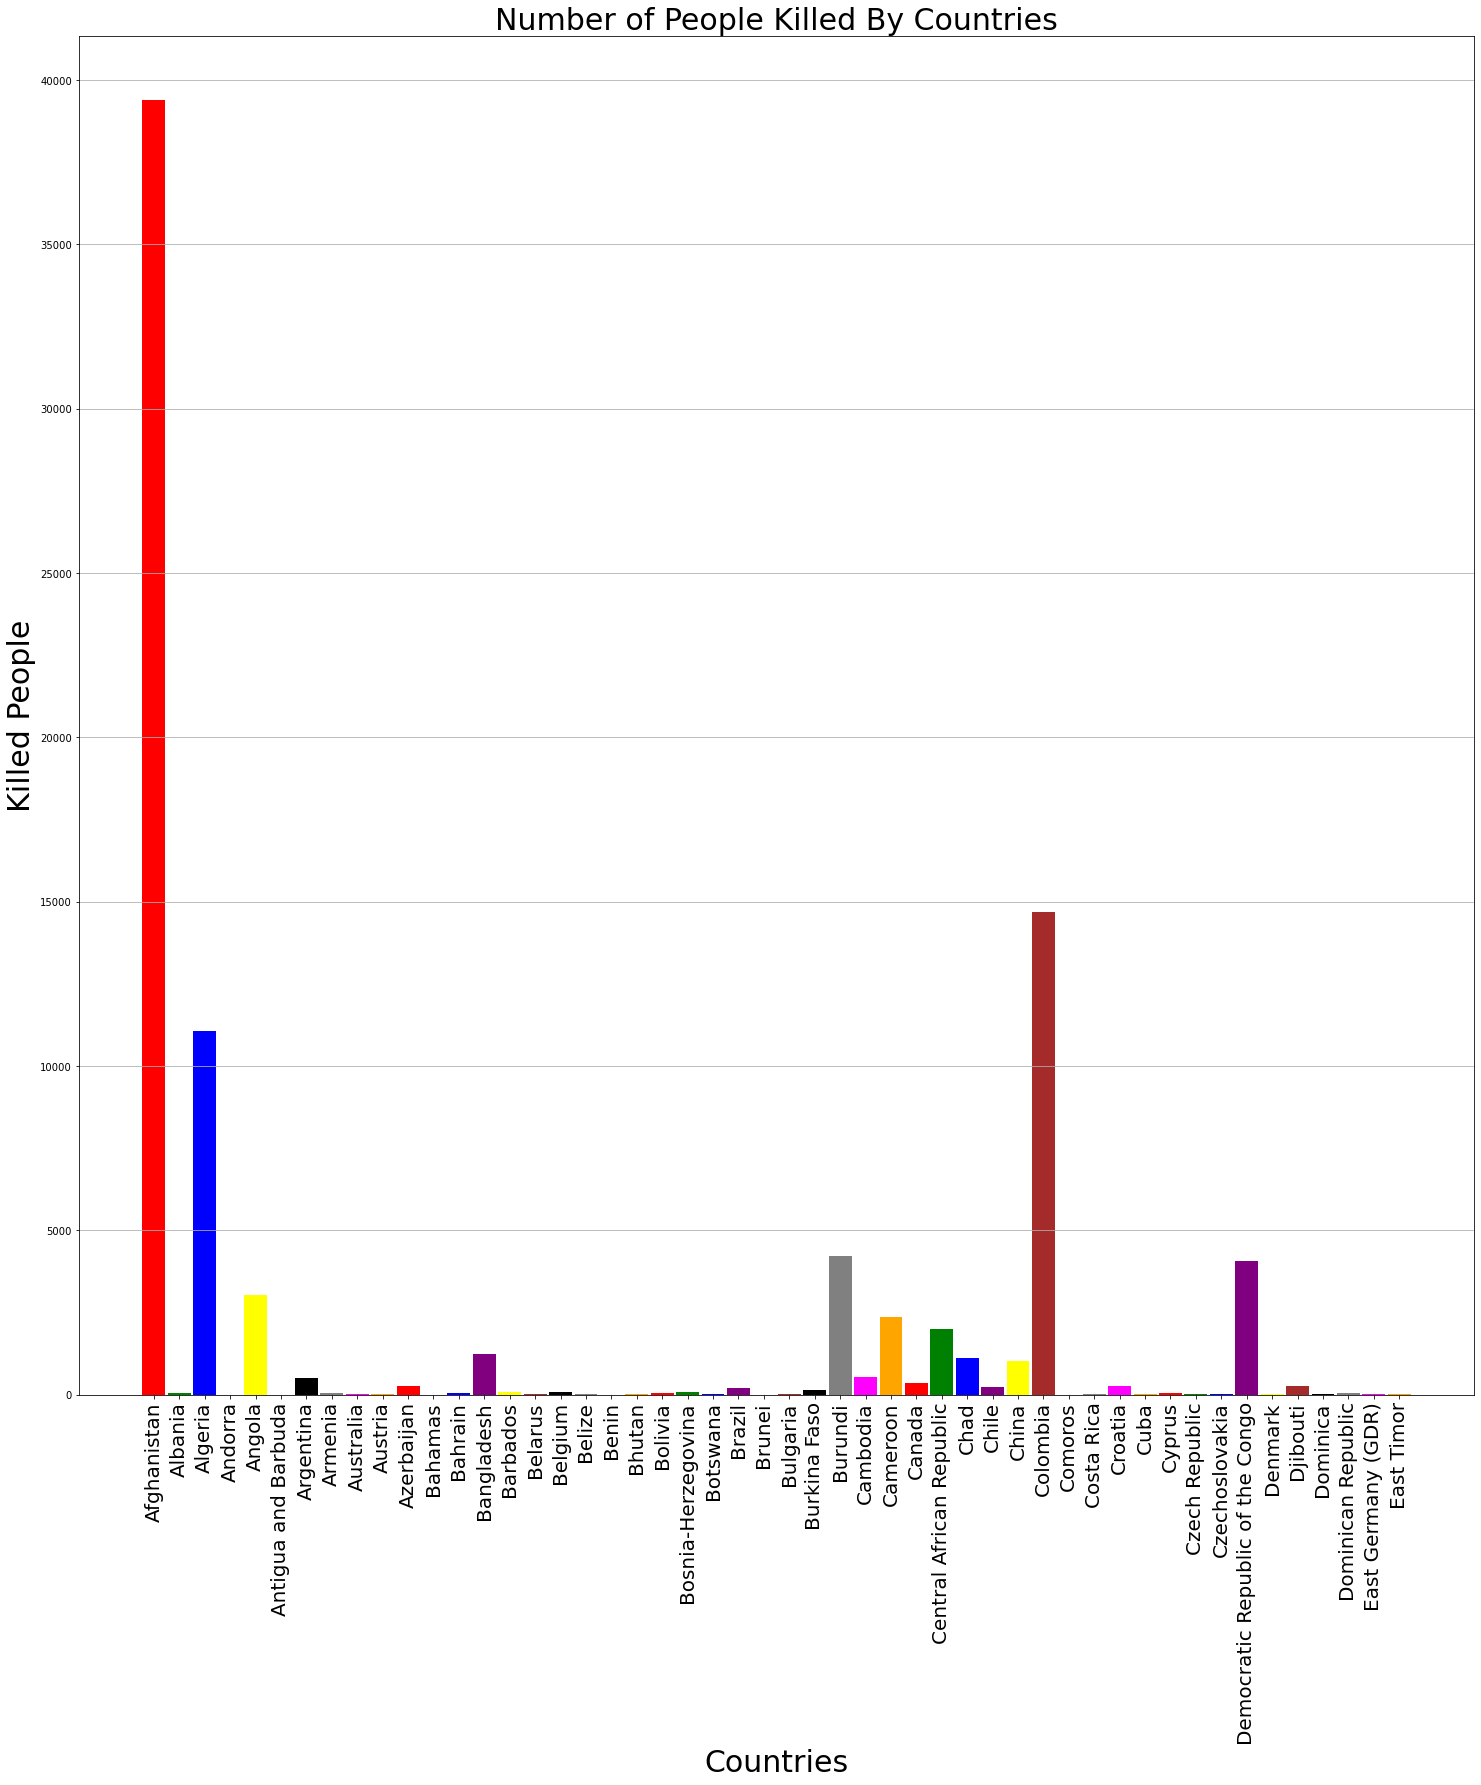

In [97]:

labels = countryKillFormatData.columns.tolist()
labels = labels[:50] #50 bar provides nice view
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[:50]
values = [int(i[0]) for i in values] # convert float to int
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange'] # color list for bar chart bar color 
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=30)
plt.xlabel('Countries', fontsize = 30)
plt.xticks(index, labels, fontsize=20, rotation=90)
plt.title('Number of People Killed By Countries', fontsize = 30)
# print(fig_size)
plt.show()

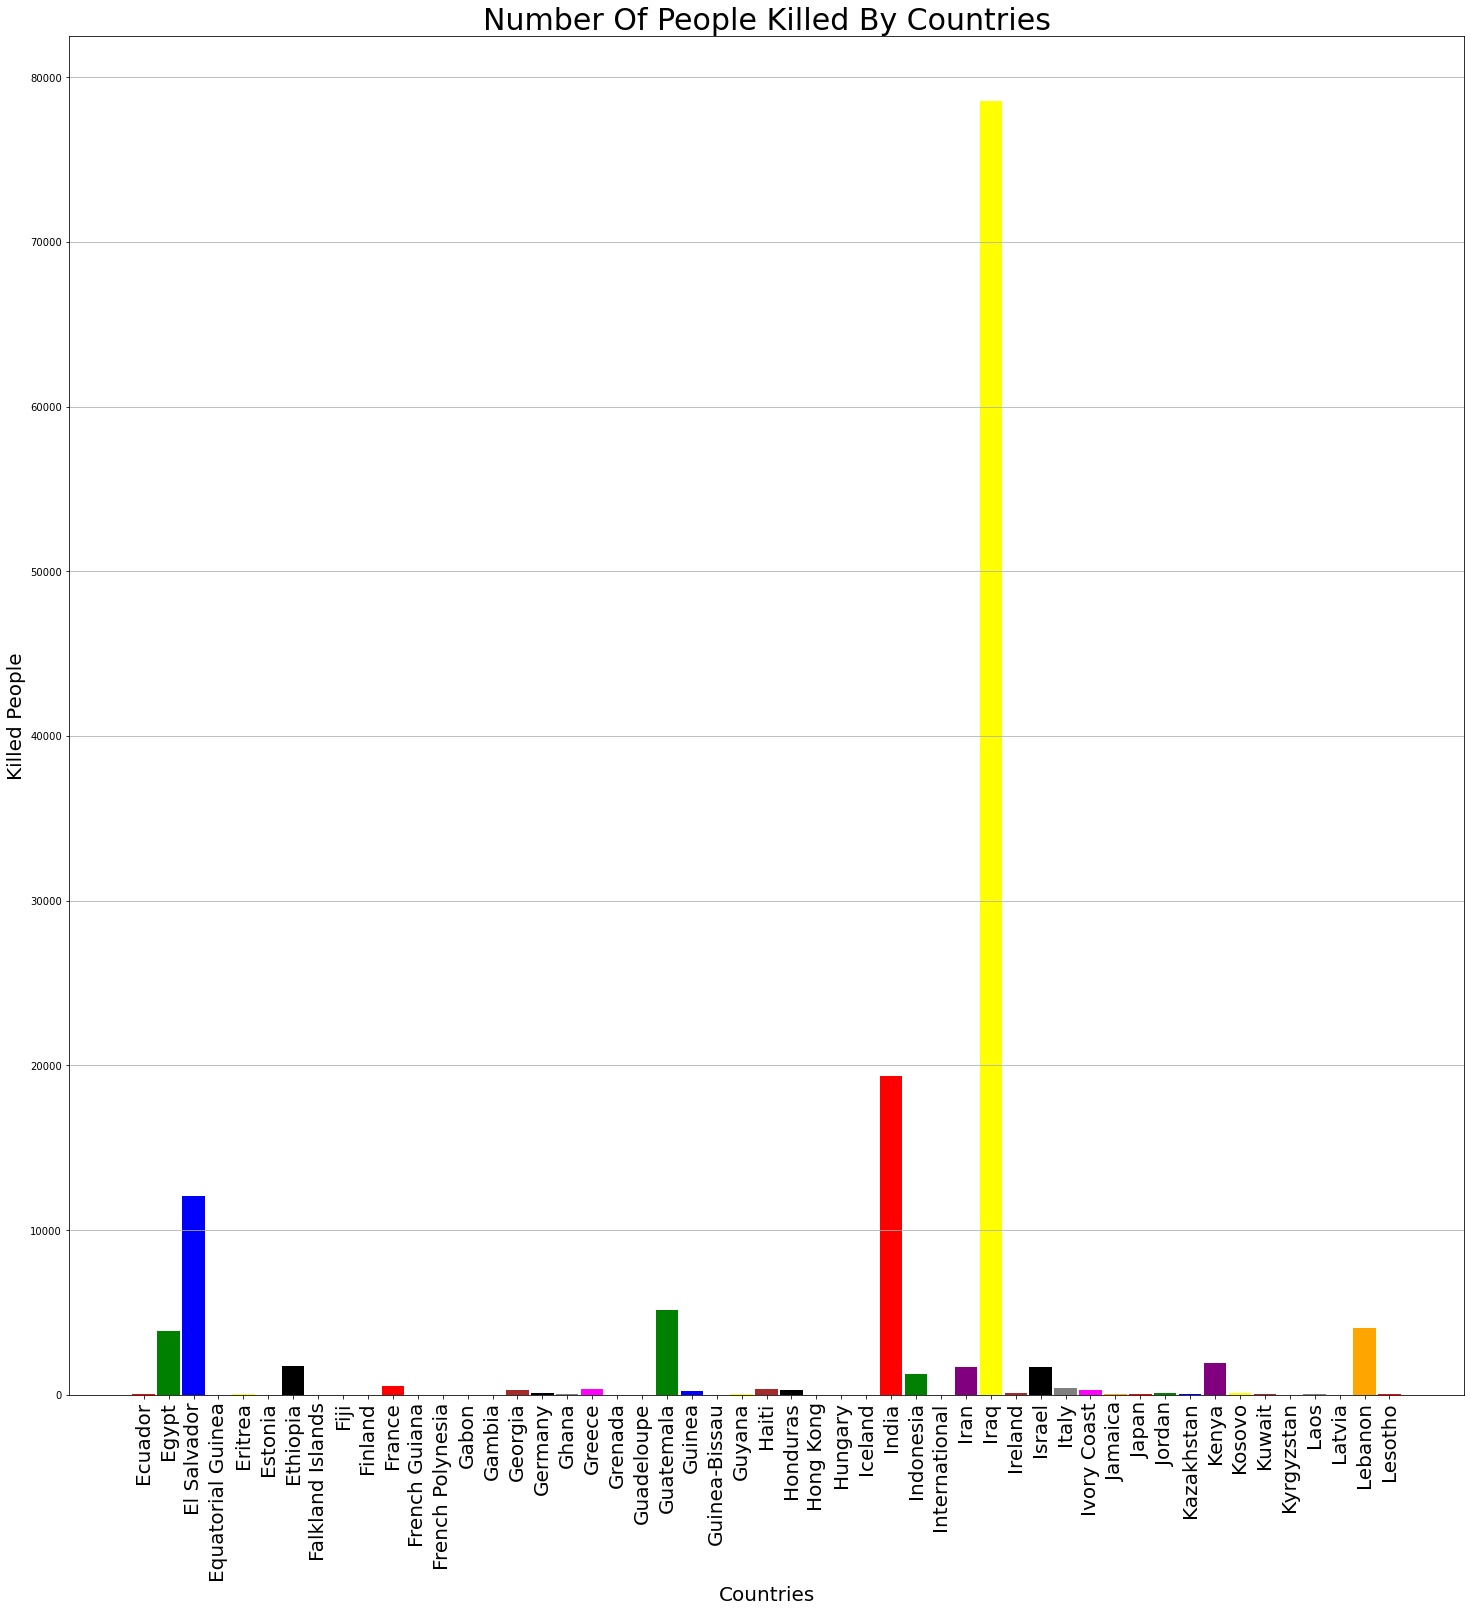

In [98]:
labels = countryKillFormatData.columns.tolist()
labels = labels[50:101]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[50:101]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=20
fig_size[1]=20
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize=20, rotation=90)
plt.title('Number Of People Killed By Countries', fontsize = 30)
plt.show()

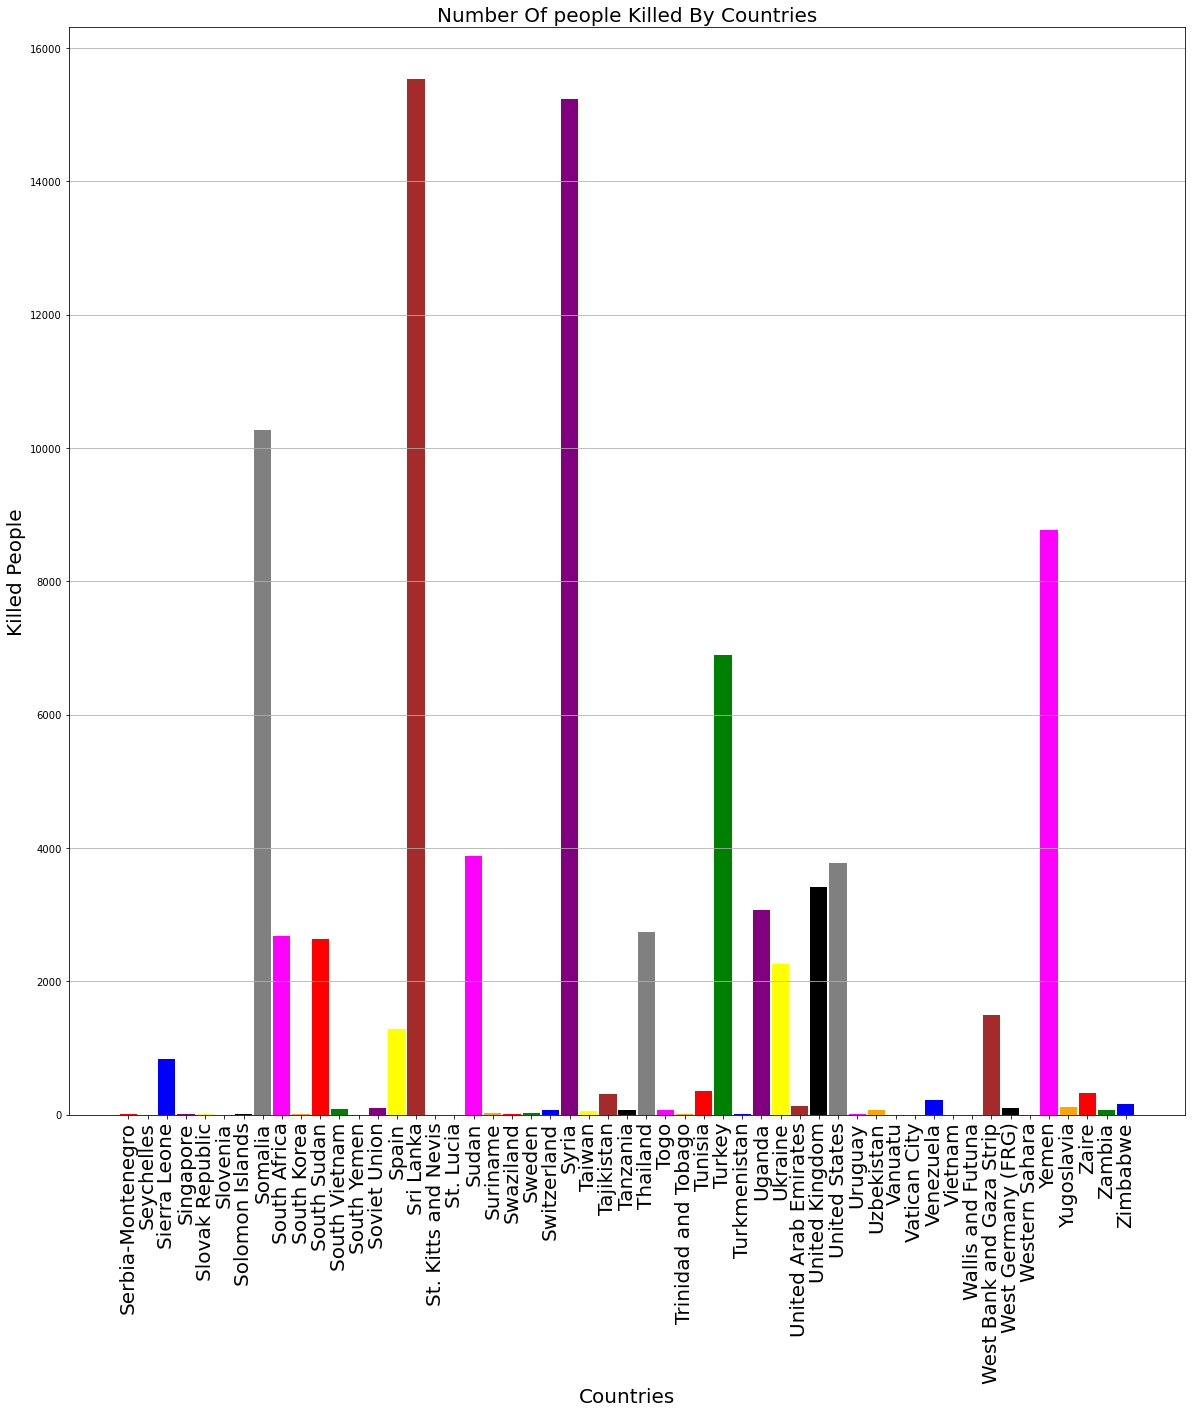

In [99]:
labels = countryKillFormatData.columns.tolist()
labels = labels[152:206]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[152:206]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize=20, rotation=90)
plt.title('Number Of people Killed By Countries', fontsize = 20)
plt.show()

### From the above graphs, we can see that the countries where most people are killed are : Afghanisthan, Columbia, Iran, Sri lanka, Syria, Somalia, Yemen naming a few. Even though there is a perception that Muslims are supporters of terrorism, Muslims are the people who are most damaged by terrorist attack